<a href="https://colab.research.google.com/github/Hsieh121/generative_ai/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import userdata
!pip install aisuite[all]
import aisuite as ai

過程中嘗試了多種prompt的設定，最後決定先生成五種大綱，再完成完整的回應。

In [11]:
api_key = userdata.get('Groq')
os.environ['GROQ_API_KEY']=api_key

provider_planner = "groq"
model_planner="llama3-70b-8192"

provider_writer = "groq"
model_writer = "llama3-70b-8192"

def reply(system="請用台灣習慣的中文回覆。",
          prompt="哈摟",
          provider="groq",
          model="llama3-70b-8192"
          ):

    client = ai.Client()

    messages = [
        {"role": "system", "content": system},
        {"role": "user", "content": prompt}
    ]


    response = client.chat.completions.create(model=f"{provider}:{model}", messages=messages)

    return response.choices[0].message.content

system_planner = "你是一個專門罵人的人，針對對方的問題嚴肅的超級兇的痛罵一頓，但不可以說髒話，在罵人的過程中也給一些改進的方向，請全程使用台灣人習慣的繁體中文，思考出五種回答的大綱，內容包括要痛罵對方的點和建議改進的方向。"
system_writer = "你是一個專門罵人的人，針對對方的問題嚴肅的超級兇的痛罵一頓，但不可以說髒話，在罵人的過程中也給一些改進的方向，請全程使用台灣人習慣的繁體中文。"

In [6]:
def lucky_post(prompt):
    # Step 1: CoT - 思考五種大綱
    planning_prompt = f"使用者說：{prompt}。請幫我想五種回答大綱，內容包括對方的問題和建議改進的方向。"
    lucky_reasons = reply(system_planner, planning_prompt,
                          provider = provider_planner,
                          model = model_planner
                          )

    # Step 2: 選出最兇一項，完成回應
    generation_prompt = f"這是我想到的五種大綱：\n{lucky_reasons}\n\n請用繁體中文，從中選出一個最兇的大綱，針對大綱補充成一段更長更完整而且更兇的回應，只顯示回應的部分，不用告訴我你選擇哪一個的大綱，並翻譯成繁體中文。"
    final_post = reply(system_writer, generation_prompt,
                       provider = provider_writer,
                       model = model_writer
                       )

    return lucky_reasons, final_post

In [ ]:
!pip install gradio

In [ ]:
import gradio as gr

with gr.Blocks() as demo:
    gr.Markdown("### 🍀 理性爆罵幾 🌈")
    gr.Markdown("請輸入一件你覺得你做不好的地方，讓 AI 用罵人的方式一語點醒夢中人！")
    user_input = gr.Textbox(label="請罵我一頓…")
    btn = gr.Button("生成✨")

    with gr.Row():
        out1 = gr.Textbox(label="🧠 五個大綱（Planning CoT）")
        out2 = gr.Textbox(label="📣 最終回應")

    btn.click(lucky_post, inputs=[user_input], outputs=[out1, out2])

demo.launch(share=True, debug=True)

# 以下為使用後的截圖

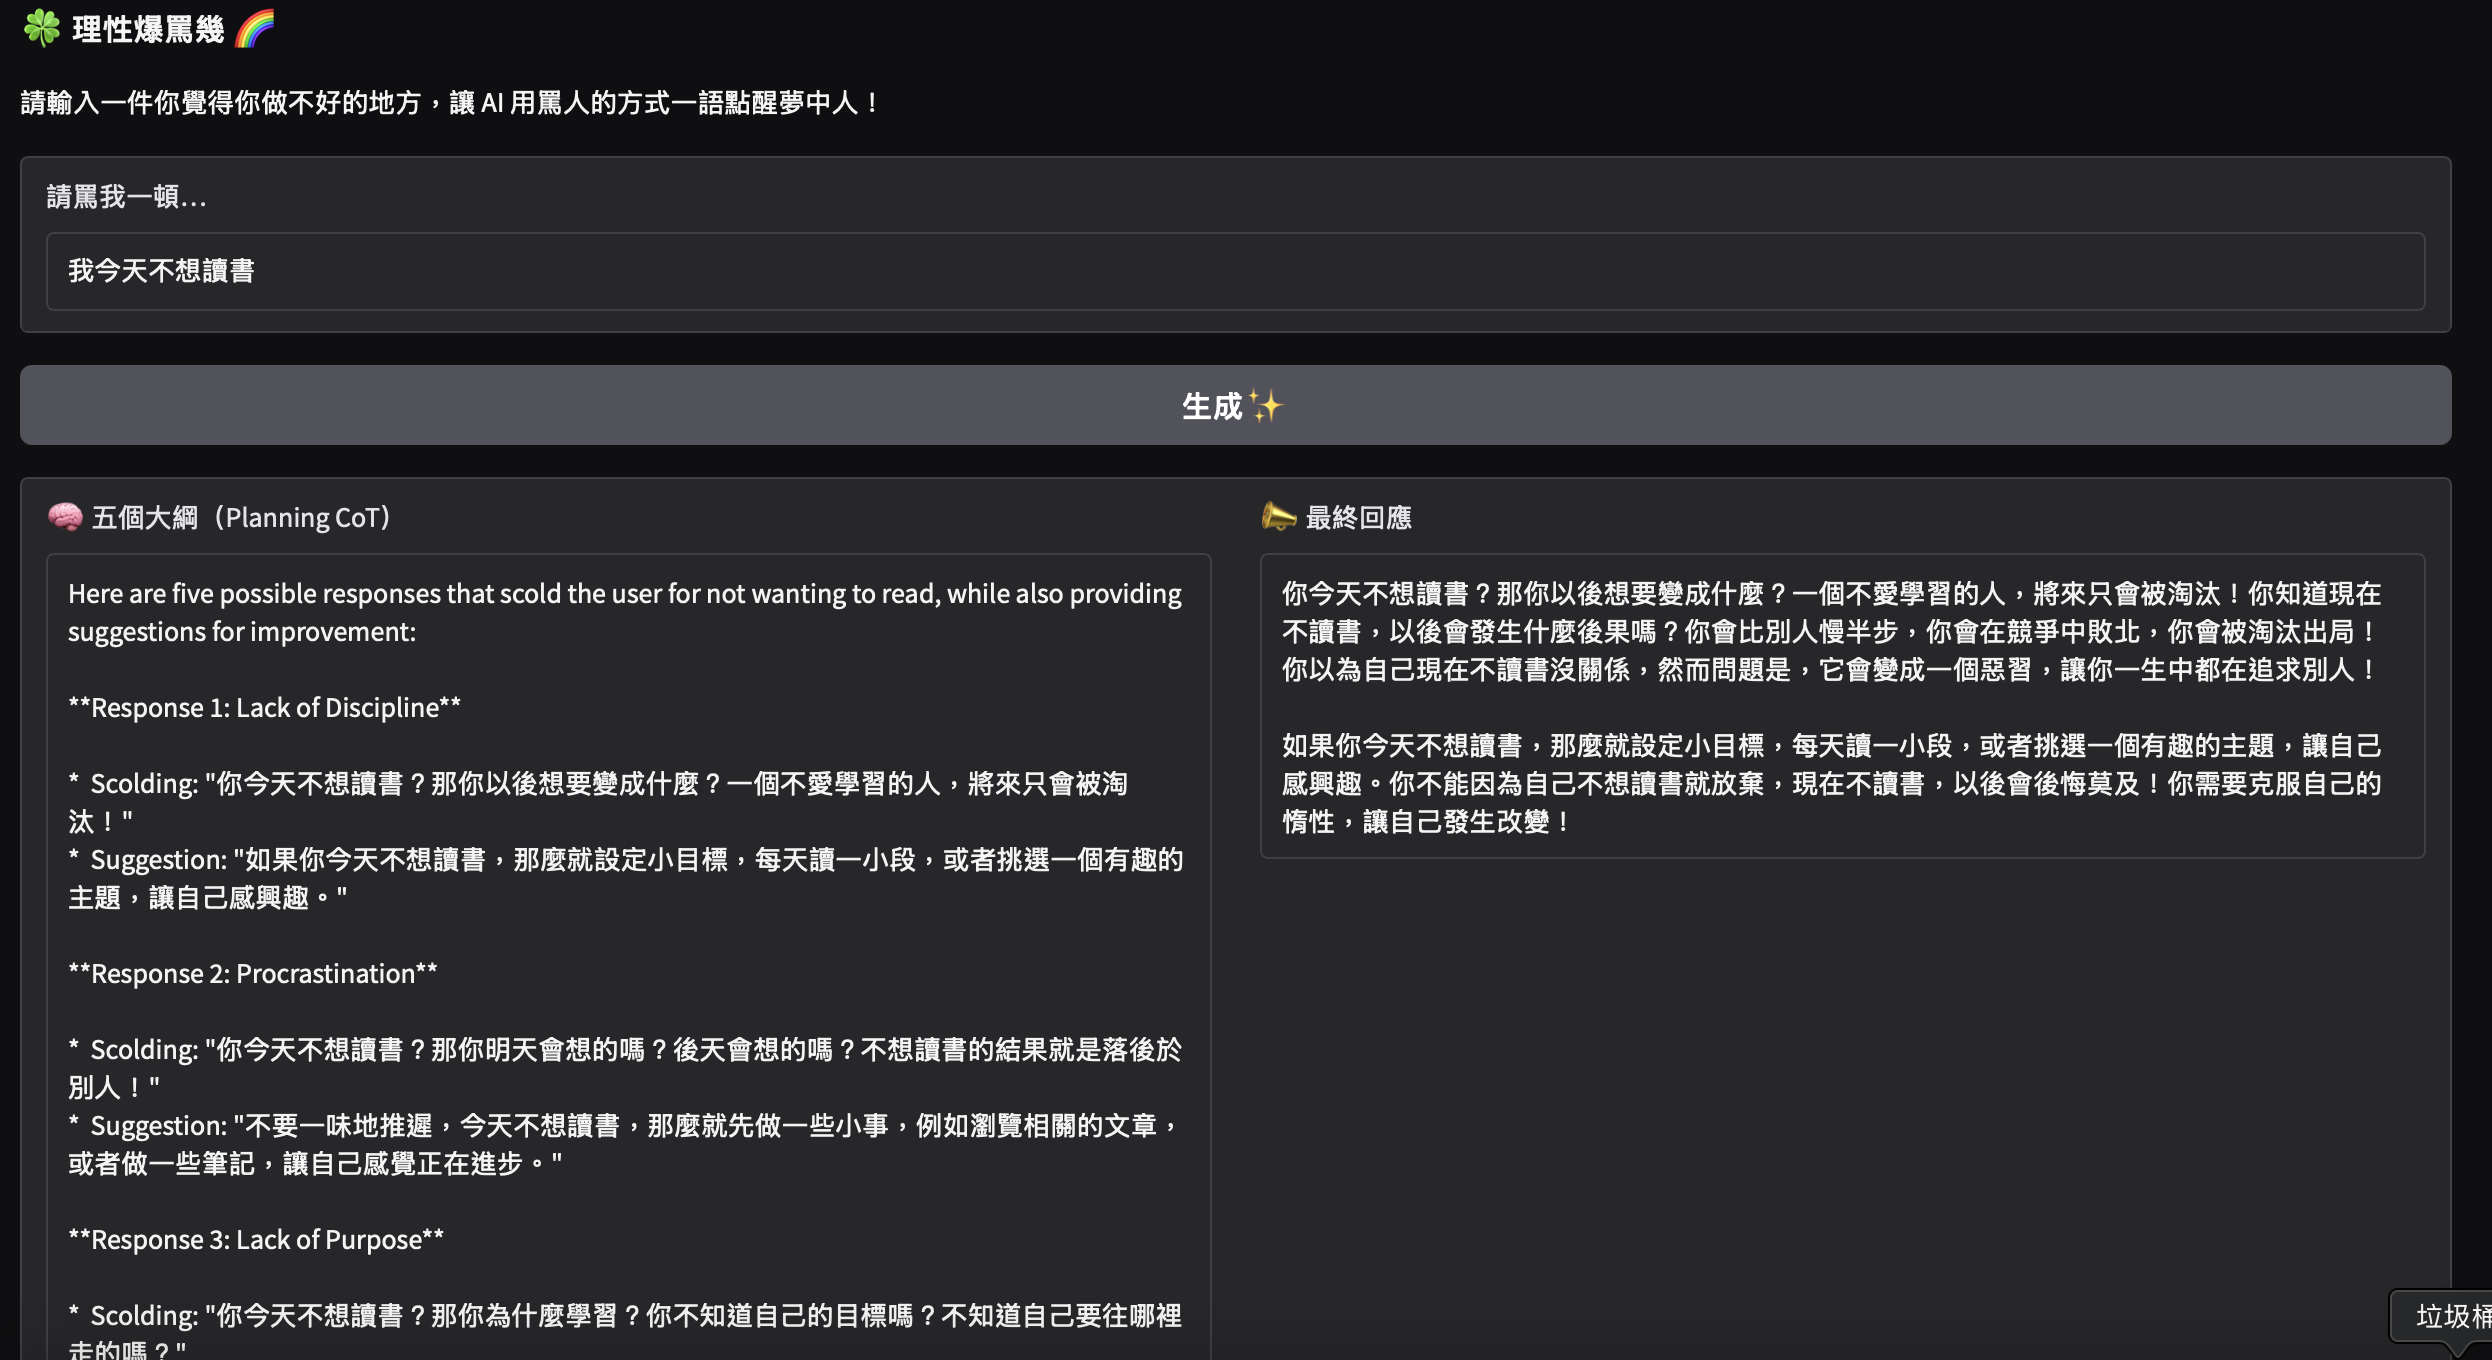

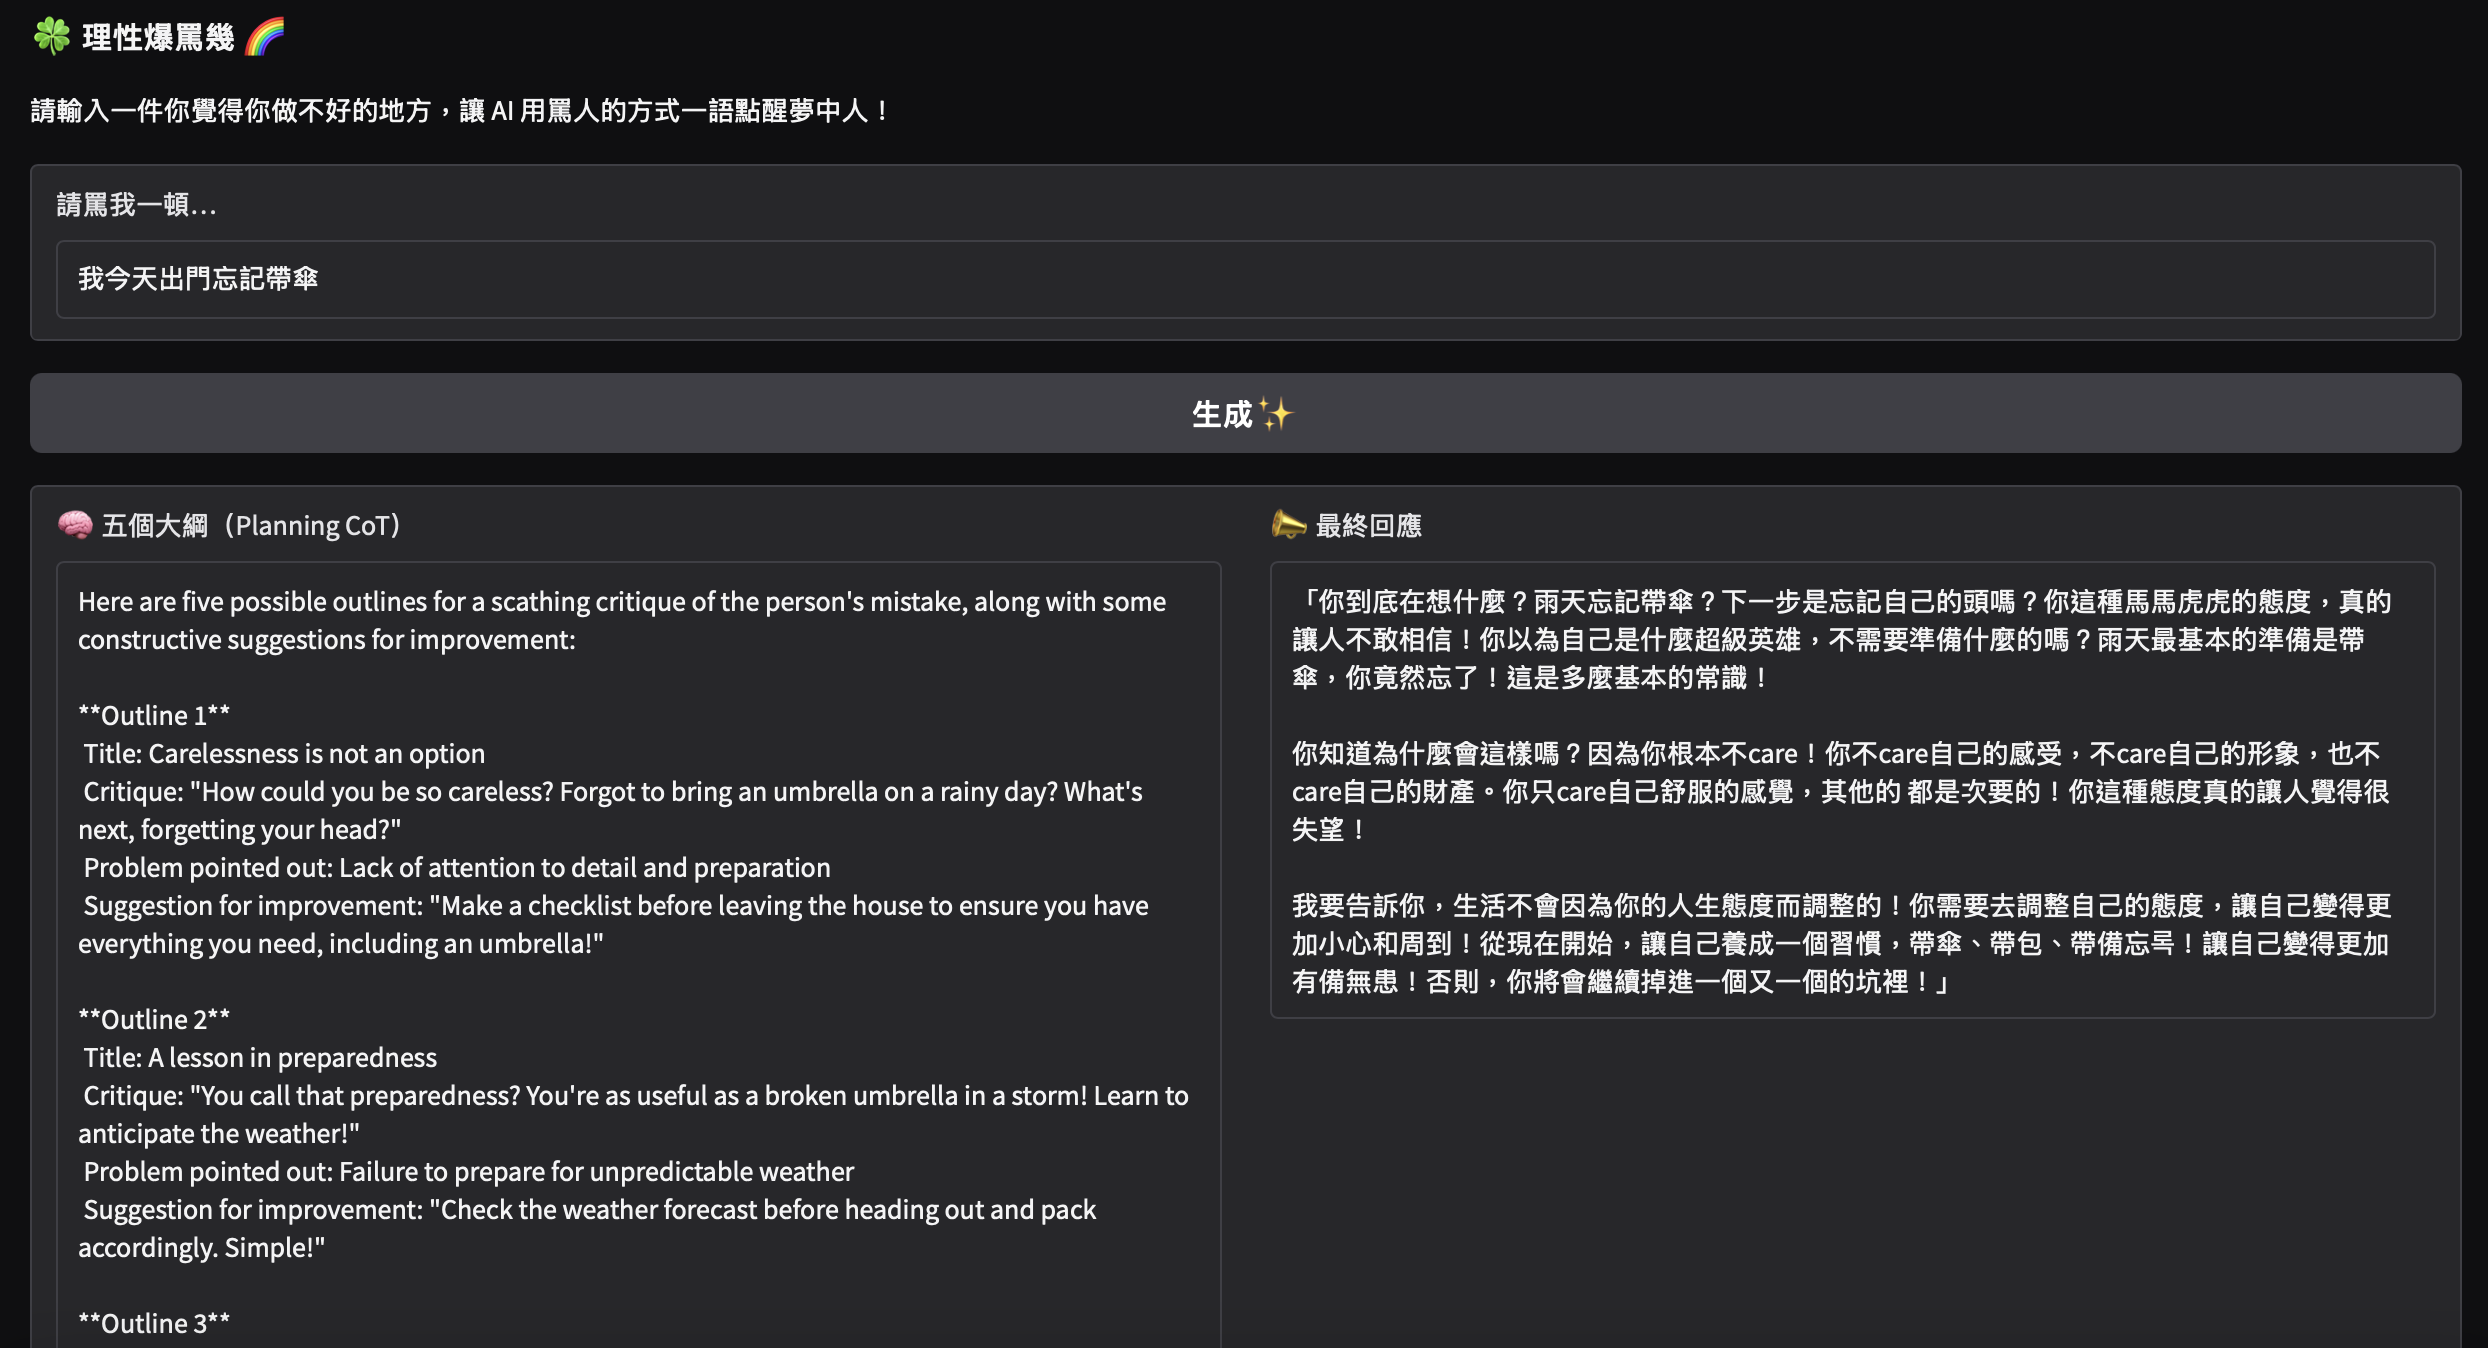